# Oasis Infobyte Sales Prediction 

## Author : Pathan Mobina Sulthana

## Sales perediction Based on Advertising 

## Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importing and reading the dataset into dataframe df

In [4]:
df=pd.read_csv("Advertising.csv")

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## checking for dataframe shape

In [6]:
df.shape

(200, 5)

In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Descriptive Statistics to check null values

In [9]:
df.describe(include="all")

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## here the count for all columns is same so there is no null values in data

## task is to predict sales value so we can use linear regression for this project

## The datatset is already encoded 

## Standradization 

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [11]:
salesdf=pd.DataFrame(sc.fit_transform(df))

In [12]:
salesdf.columns=df.columns

In [13]:
salesdf.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,-1.723412,0.969852,0.981522,1.778945,1.552053
1,-1.706091,-1.197376,1.082808,0.669579,-0.696046
2,-1.688771,-1.516155,1.528463,1.783549,-0.907406
3,-1.671450,0.052050,1.217855,1.286405,0.860330
4,-1.654129,0.394182,-0.841614,1.281802,-0.215683


## checking for outliers


<AxesSubplot:>

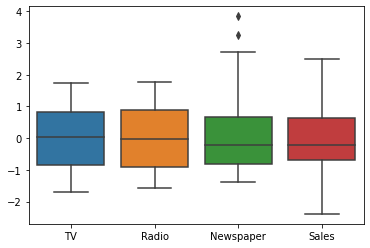

In [25]:
import seaborn as sns
sns.boxplot(data=salesdf[['TV', 'Radio', 'Newspaper', 'Sales']])

## there are outliers in NewsPaper column

In [26]:
outliers=[]
for i in salesdf.columns :
    q1=np.percentile(salesdf[i],25)
    q3=np.percentile(salesdf[i],75)
    iqr=q3-q1
    min=q1-1.5*iqr
    max=q3+1.5*iqr
    for j in salesdf[i]:
        if j<min :
            print(i)
            outliers.append(j)
            salesdf[i].replace(j,min,inplace=True)
        elif j>max:
            print(i)
            outliers.append(j)
            salesdf[i].replace(j,max,inplace=True)
print(outliers)

Newspaper
Newspaper
[3.8411707150992718, 3.238153957342154]


## here we replaced the outliers wih suitable values

<AxesSubplot:>

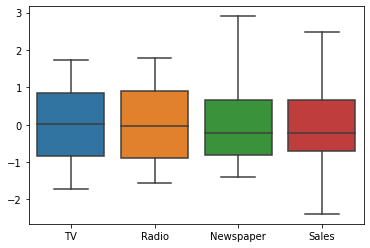

In [27]:
sns.boxplot(data=salesdf[['TV', 'Radio', 'Newspaper', 'Sales']])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<AxesSubplot:>

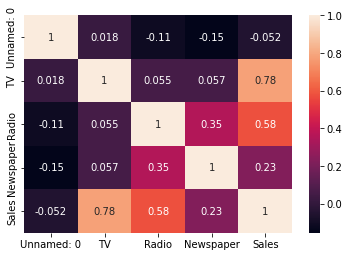

In [73]:
sns.heatmap(df.corr(),annot=True)

## here we can see TV is the Advertising medium which is more related to sales

In [130]:
x=salesdf.drop("Sales",axis=1)
y=salesdf["Sales"]

In [131]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=88)

In [132]:
xtrain

,Unnamed: 0,TV,Radio,Newspaper
98,-0.025981,1.665794,1.285378,0.950373
109,0.164547,1.265277,0.245516,-1.153281
137,0.649527,1.478964,0.380563,1.341643
20,-1.376998,0.833233,0.299535,1.051643
156,0.978621,-0.620538,1.366407,0.918151
...,...,...,...,...
101,0.025981,1.744029,0.880237,2.903273
148,0.840055,-1.273276,1.150331,-0.858677
106,0.112585,-1.425075,-0.828109,-0.039311
177,1.342356,0.270407,-1.044184,0.213864


In [133]:
xtest

,Unnamed: 0,TV,Radio,Newspaper
199,1.723412,0.993206,-0.990165,-1.005979
2,-1.688771,-1.516155,1.528463,1.783549
158,1.013262,-1.580378,0.920751,0.674182
13,-1.498243,-0.578502,-1.057689,-1.075027
39,-1.047904,0.945331,0.974770,0.066562
166,1.151828,-1.507981,0.968018,-0.412169
129,0.510961,-1.021055,-0.760585,0.577515
74,-0.441678,0.774848,0.090211,-0.803439
85,-0.251151,0.538975,-0.328435,1.617834
180,1.394318,0.111602,-1.395307,-1.024392


In [134]:
ytrain

98     2.186132
109    1.110119
137    1.302264
20     0.764258
156    0.245466
         ...   
101    1.878700
148   -0.599973
106   -1.310911
177   -0.446257
32    -0.849762
Name: Sales, Length: 140, dtype: float64

In [135]:
ytest

199   -0.119610
2     -0.907406
158   -1.291696
13    -0.830548
39     1.436766
166   -1.157195
129   -0.830548
74     0.572112
85     0.226251
180   -0.676832
33     0.648971
57    -0.158039
87     0.379967
69     1.590482
111    1.494410
21    -0.292541
153    0.956403
105    0.994832
113    0.360753
96    -0.446257
53     1.379122
91    -1.291696
190   -0.619188
45     0.168607
30     1.417551
14     0.956403
79    -0.580759
95     0.552898
120    0.283895
52     1.648126
145   -0.715261
22    -1.618343
130   -2.386924
159   -0.215683
24    -0.830548
63    -0.004323
64     0.764258
42     1.283050
162    0.168607
60    -1.137980
100   -0.446257
19     0.110964
182   -1.022693
172   -1.234053
59     0.841116
8     -1.772059
15     1.609697
195   -1.234053
136   -0.868977
164   -0.407828
76    -1.368554
118    0.360753
140   -0.599973
143   -0.696046
68     0.937188
17     1.993987
41     0.591327
65    -0.907406
46    -0.657617
142    1.167763
Name: Sales, dtype: float64

In [136]:
xtrain.shape

(140, 4)

In [137]:
ytrain.shape

(140,)

In [138]:
xtest.shape

(60, 4)

In [139]:
ytest.shape

(60,)

## Linear Regression model

In [140]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [141]:
lrpred=lr.predict(xtest)

In [142]:
lrpred

array([ 0.20206632, -0.33075086, -0.66484114, -1.04862928,  1.24283657,
       -0.54899472, -1.22982488,  0.63450512,  0.14468173, -0.69509873,
        0.91704555, -0.25882489,  0.30253391,  1.40220559,  1.40196106,
        0.05105776,  0.84476088,  0.77721731,  0.45606829, -0.31774488,
        1.14771025, -1.90702881, -0.19617571,  0.18655338,  1.42126214,
        0.82114545, -0.89095262,  0.42294171,  0.05736766,  1.2913939 ,
       -0.87327511, -1.51324145, -0.61033652, -0.33185381, -1.17161578,
       -0.12921342,  0.60897884,  1.46353691,  0.1633517 , -1.6612873 ,
       -0.12995217,  0.01080054, -1.47692631, -1.21440195,  0.80553365,
       -2.03178541,  1.31781178, -1.68754259, -0.41652154, -0.56221493,
       -1.89901156,  0.27251059, -0.86898475, -1.07037776,  0.95914061,
        1.74501464,  0.62074324, -1.20993466, -1.05822635,  1.01515074])

In [143]:
from sklearn.metrics import mean_absolute_error,confusion_matrix

In [144]:
lrerror=mean_absolute_error(ytest,lrpred)

In [145]:
lrerror

0.2603809716709385

## here the error is gratet than 20% so we should try Decision tree Regressor

## Decision Tree Regression


In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
dtr=DecisionTreeRegressor()

In [148]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [149]:
dtrpred=dtr.predict(xtest)

In [150]:
dtrpred

array([-0.21568303, -0.92662039, -1.59912871, -0.83054778,  1.55205313,
       -1.02269301, -1.08033658,  0.64897053,  0.1301784 , -0.75368968,
        0.36075268, -0.15803946, -0.13882493,  1.47519504,  1.57126765,
       -0.38861374,  0.76425767,  0.61054148,  0.30310911, -0.50390088,
        1.8594855 , -1.31091086, -0.46547183,  0.49525434,  0.93718838,
        0.82190124, -0.58075897,  0.76425767,  0.18782197,  1.47519504,
       -0.71526063, -1.426198  , -2.0794918 , -0.15803946, -1.04190753,
       -0.38861374,  0.51446886,  1.18697718,  0.1301784 , -1.04190753,
       -0.35018469,  0.49525434, -1.08033658, -1.426198  ,  0.82190124,
       -1.63755776,  1.8594855 , -1.08033658, -1.02269301, -0.11961041,
       -1.426198  ,  0.22625101, -0.48468635, -0.46547183,  1.11011909,
        1.55205313,  0.76425767, -0.79211873, -0.83054778,  1.07169004])

In [151]:
dtrerror=mean_absolute_error(ytest,dtrpred)

In [152]:
dtrerror

0.16844732206389632

## trying another regression model i.e support vector machine regressor

In [154]:
from sklearn.svm import SVR

In [155]:
svr=SVR()

In [156]:
svr.fit(xtrain,ytrain)

SVR()

In [157]:
svrpred=svr.predict(xtest)

In [158]:
svrerror=mean_absolute_error(ytest,svrpred)

In [159]:
svrerror

0.15399593835287068

## Randomforest regressor

In [161]:
from sklearn.ensemble import RandomForestRegressor

In [162]:
rf=RandomForestRegressor(n_estimators=10)

In [163]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=10)

In [164]:
rfpred=rf.predict(xtest)

In [165]:
rferror=mean_absolute_error(ytest,rfpred)

In [166]:
rferror

0.1463506201201533

## the results of different regressions are here 

In [168]:
lrerror,dtrerror,svrerror,rferror

(0.2603809716709385,
 0.16844732206389632,
 0.15399593835287068,
 0.1463506201201533)

## from all regressions the Random Forest Regressor gives low mean_absolute_error and  it will be a good fit for this project for sales prediction based on Advertising medium.